In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# ËÆÄÂèñÊï∏Êìö
df = pd.read_csv("Cabbage_weather_price.csv")

# ‚úÖ ËΩâÊèõ ObsTime ÁÇ∫ datetime
df["ObsTime"] = pd.to_datetime(df["ObsTime"], format="%Y/%m/%d")

print("=== Êï∏ÊìöÂü∫Êú¨‰ø°ÊÅØ ===")
print(f"Êï∏ÊìöÂΩ¢ÁãÄ: {df.shape}")
print(f"ÊôÇÈñìÁØÑÂúç: {df['ObsTime'].min().date()} Âà∞ {df['ObsTime'].max().date()}")
print("\nÊï∏ÊìöÂâç5Ë°å:")
print(df.head())

print("\n=== Êï∏ÊìöÈ°ûÂûãËàáÁº∫Â§±ÂÄºÊ™¢Êü• ===")
print(df.info())
print("\nÁº∫Â§±ÂÄºÁµ±Ë®à:")
print(df.isnull().sum())

print("\n=== Êï∏ÂÄºÂûãËÆäÊï∏ÊèèËø∞ÊÄßÁµ±Ë®à ===")
print(df.describe())


=== Êï∏ÊìöÂü∫Êú¨‰ø°ÊÅØ ===
Êï∏ÊìöÂΩ¢ÁãÄ: (365, 9)
ÊôÇÈñìÁØÑÂúç: 2024-01-01 Âà∞ 2024-12-31

Êï∏ÊìöÂâç5Ë°å:
     ObsTime      StnPres  Temperature         RH        WS     Precp  \
0 2024-01-01  1002.256858    16.937810  73.833344  2.578272  0.023611   
1 2024-01-02  1000.071372    17.352462  77.081207  1.404666  0.000000   
2 2024-01-03  1000.967058    16.259082  78.350365  3.044548  0.390670   
3 2024-01-04  1001.986184    15.198044  72.991178  1.576658  0.000000   
4 2024-01-05  1001.936560    16.377503  79.120694  1.278478  0.000000   

    GloblRad  typhoon  Cabbage price  
0  18.246640        0       9.475000  
1  18.300321        0       9.018750  
2  17.804985        0       8.342857  
3  16.893827        0       7.584615  
4  17.527979        0       8.575294  

=== Êï∏ÊìöÈ°ûÂûãËàáÁº∫Â§±ÂÄºÊ™¢Êü• ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         ------

In [4]:
df['ObsTime'].max()


Timestamp('2024-12-31 00:00:00')

In [5]:
import pandas as pd

# ËÆÄÂèñÊúÄÊñ∞‰∏äÂÇ≥Ê™îÊ°à
df = pd.read_csv("Cabbage_weather_price.csv")

# ËΩâÁÇ∫ datetime Ê†ºÂºè
df["ObsTime"] = pd.to_datetime(df["ObsTime"], errors="coerce", format="%Y/%m/%d")

# È°ØÁ§∫ÊúÄÊó©ËàáÊúÄÊôöÊó•Êúü
print("ÊúÄÊó©Êó•Êúü:", df["ObsTime"].min())
print("ÊúÄÊôöÊó•Êúü:", df["ObsTime"].max())

ÊúÄÊó©Êó•Êúü: 2024-01-01 00:00:00
ÊúÄÊôöÊó•Êúü: 2024-12-31 00:00:00


In [6]:
# =============================================================================
# ÊôÇÈñìÁâπÂæµÂ∑•Á®ã
# =============================================================================

import numpy as np

print("\n=== ÊôÇÈñìÁâπÂæµÂ∑•Á®ã ===")

# ËΩâÊèõÊôÇÈñìÊ†ºÂºè
df['ObsTime'] = pd.to_datetime(df['ObsTime'])

# ÊèêÂèñÊôÇÈñìÁâπÂæµ
df['year'] = df['ObsTime'].dt.year
df['month'] = df['ObsTime'].dt.month
df['day'] = df['ObsTime'].dt.day
df['dayofweek'] = df['ObsTime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['dayofyear'] = df['ObsTime'].dt.dayofyear
df['quarter'] = df['ObsTime'].dt.quarter

# Â≠£ÁØÄÁâπÂæµ (Âè∞ÁÅ£Ê∞£ÂÄôÂàÜÂ≠£)
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # ÂÜ¨Â≠£
    elif month in [3, 4, 5]:
        return 1  # Êò•Â≠£
    elif month in [6, 7, 8]:
        return 2  # Â§èÂ≠£
    else:
        return 3  # ÁßãÂ≠£

df['season'] = df['month'].apply(get_season)

# ÈÄ±ÊúüÊÄßÁâπÂæµ (ÊçïÊçâÂ≠£ÁØÄÊÄßÊ®°Âºè)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365)
df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365)

# ÊòØÂê¶ÈÄ±Êú´
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

print("ÊôÇÈñìÁâπÂæµÂâµÂª∫ÂÆåÊàê!")
print("Êñ∞Â¢ûÁâπÂæµ:", ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter', 'season', 
                 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dayofyear_sin', 'dayofyear_cos', 'is_weekend'])


=== ÊôÇÈñìÁâπÂæµÂ∑•Á®ã ===
ÊôÇÈñìÁâπÂæµÂâµÂª∫ÂÆåÊàê!
Êñ∞Â¢ûÁâπÂæµ: ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'quarter', 'season', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dayofyear_sin', 'dayofyear_cos', 'is_weekend']


In [7]:
# =============================================================================
# Ê∞£Ë±°ÁâπÂæµÂ∑•Á®ã
# =============================================================================

print("\n=== Ê∞£Ë±°ÁâπÂæµÂ∑•Á®ã ===")

# Typhoon one-hot encoding (Â∑≤Á∂ìÊòØ0/1ÔºåÁõ¥Êé•ÈáçÂëΩÂêç)
df['is_typhoon'] = df['typhoon']
print(f"È¢±È¢®Â§©Êï∏: {df['is_typhoon'].sum()} Â§© ({df['is_typhoon'].mean()*100:.1f}%)")

# Ê∫´Â∫¶Áõ∏ÈóúÁâπÂæµ
df['temp_squared'] = df['Temperature'] ** 2  # ÈùûÁ∑öÊÄßÈóú‰øÇ
df['temp_cubed'] = df['Temperature'] ** 3

# Ê∫´Â∫¶ÂàÜÁ¥ö
df['temp_quantile'] = pd.qcut(df['Temperature'], q=4, labels=[0, 1, 2, 3])
df['is_hot'] = (df['Temperature'] > df['Temperature'].quantile(0.75)).astype(int)
df['is_cold'] = (df['Temperature'] < df['Temperature'].quantile(0.25)).astype(int)

# ÊøïÂ∫¶ÁâπÂæµ
df['humidity_level'] = pd.cut(df['RH'], bins=[0, 60, 80, 100], labels=[0, 1, 2])  # ‰Ωé„ÄÅ‰∏≠„ÄÅÈ´òÊøïÂ∫¶

# È¢®ÈÄüËàáÊøïÂ∫¶‰∫§‰∫í‰ΩúÁî®
df['humid_wind_interaction'] = df['RH'] * df['WS']
df['temp_humid_interaction'] = df['Temperature'] * df['RH']

# ÈôçÈõ®ÈáèÁâπÂæµ
df['rain_level'] = pd.cut(df['Precp'], 
                         bins=[-0.1, 0, 1, 5, float('inf')], 
                         labels=[0, 1, 2, 3])  # ÁÑ°Èõ®„ÄÅÂ∞èÈõ®„ÄÅ‰∏≠Èõ®„ÄÅÂ§ßÈõ®

df['has_rain'] = (df['Precp'] > 0).astype(int)
df['log_precp'] = np.log1p(df['Precp'])  # log(1+x) ËôïÁêÜ0ÂÄº

# Êó•ÁÖßÁâπÂæµ
df['sunlight_level'] = pd.qcut(df['GloblRad'], q=3, labels=[0, 1, 2])

# Ê∞£Â£ìÁâπÂæµ
df['pressure_ma_7'] = df['StnPres'].rolling(window=7, center=True).mean()
df['pressure_anomaly'] = np.abs(df['StnPres'] - df['pressure_ma_7'])

# Ê•µÁ´ØÂ§©Ê∞£ÊåáÊ®ô
df['extreme_temp'] = ((df['Temperature'] > df['Temperature'].quantile(0.95)) | 
                     (df['Temperature'] < df['Temperature'].quantile(0.05))).astype(int)

df['extreme_rain'] = (df['Precp'] > df['Precp'].quantile(0.95)).astype(int)

df['extreme_weather'] = (
    (df['is_typhoon'] == 1) |
    (df['extreme_temp'] == 1) |
    (df['extreme_rain'] == 1)
).astype(int)

print("Ê∞£Ë±°ÁâπÂæµÂâµÂª∫ÂÆåÊàê!")


=== Ê∞£Ë±°ÁâπÂæµÂ∑•Á®ã ===
È¢±È¢®Â§©Êï∏: 18 Â§© (4.9%)
Ê∞£Ë±°ÁâπÂæµÂâµÂª∫ÂÆåÊàê!


In [8]:
# =============================================================================
# ÊªØÂæåÁâπÂæµ (Lag Features)
# =============================================================================

print("\n=== ÂâµÂª∫ÊªØÂæåÁâπÂæµ ===")

# ÂÉπÊ†ºÊªØÂæåÁâπÂæµÔºàÈáçË¶ÅÔºÅÔºâ
for lag in [1, 2, 3, 7, 14, 30]:
    df[f'price_lag_{lag}'] = df['Cabbage price'].shift(lag)

# Ê∞£Ë±°ÊªØÂæåÁâπÂæµ
weather_cols = ['Temperature', 'RH', 'Precp', 'GloblRad', 'WS']
for col in weather_cols:
    for lag in [1, 3, 7]:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

print("ÊªØÂæåÁâπÂæµÂâµÂª∫ÂÆåÊàê!")


=== ÂâµÂª∫ÊªØÂæåÁâπÂæµ ===
ÊªØÂæåÁâπÂæµÂâµÂª∫ÂÆåÊàê!


In [9]:
# =============================================================================
# ÊªæÂãïÁµ±Ë®àÁâπÂæµ
# =============================================================================

print("\n=== ÂâµÂª∫ÊªæÂãïÁµ±Ë®àÁâπÂæµ ===")

# ÁßªÂãïÂπ≥Âùá
for window in [3, 7, 14, 30]:
    df[f'price_ma_{window}'] = df['Cabbage price'].rolling(window).mean()
    df[f'temp_ma_{window}'] = df['Temperature'].rolling(window).mean()
    df[f'rain_sum_{window}'] = df['Precp'].rolling(window).sum()
    df[f'humid_ma_{window}'] = df['RH'].rolling(window).mean()

# ÁßªÂãïÊ®ôÊ∫ñÂ∑ÆÔºàÊ≥¢ÂãïÊÄßÔºâ
for window in [7, 14, 30]:
    df[f'price_volatility_{window}d'] = df['Cabbage price'].rolling(window).std()
    df[f'temp_volatility_{window}d'] = df['Temperature'].rolling(window).std()

# Ë∂®Âã¢ÁâπÂæµ
df['price_trend_7d'] = df['Cabbage price'] - df['price_ma_7']
df['price_trend_14d'] = df['Cabbage price'] - df['price_ma_14']

# ÂÉπÊ†ºËÆäÂåñÁéá
for lag in [1, 3, 7]:
    df[f'price_pct_change_{lag}d'] = df['Cabbage price'].pct_change(lag)

print("ÊªæÂãïÁµ±Ë®àÁâπÂæµÂâµÂª∫ÂÆåÊàê!")


=== ÂâµÂª∫ÊªæÂãïÁµ±Ë®àÁâπÂæµ ===
ÊªæÂãïÁµ±Ë®àÁâπÂæµÂâµÂª∫ÂÆåÊàê!


In [10]:
# =============================================================================
# Áõ∏ÈóúÊÄßÂàÜÊûê
# =============================================================================

print("\n=== Áõ∏ÈóúÊÄßÂàÜÊûê ===")

# ÈÅ∏ÊìáÂéüÂßãÊï∏ÂÄºÂûãÁâπÂæµÈÄ≤Ë°åÁõ∏ÈóúÊÄßÂàÜÊûê
original_features = ['StnPres', 'Temperature', 'RH', 'WS', 'Precp', 'GloblRad', 'typhoon', 'Cabbage price']
corr_matrix = df[original_features].corr()

print("Áõ∏ÈóúÊÄßÁü©Èô£:")
print(corr_matrix.round(3))

# ËàáÈ´òÈ∫óËèúÂÉπÊ†ºÁöÑÁõ∏ÈóúÊÄß
price_corr = corr_matrix['Cabbage price'].drop('Cabbage price').sort_values(key=abs, ascending=False)
print(f"\nËàáÈ´òÈ∫óËèúÂÉπÊ†ºÁõ∏ÈóúÊÄßÊéíÂ∫è:")
for feature, corr in price_corr.items():
    strength = ""
    if abs(corr) >= 0.7:
        strength = "ÂæàÂº∑"
    elif abs(corr) >= 0.5:
        strength = "Âº∑"
    elif abs(corr) >= 0.3:
        strength = "‰∏≠Á≠â"
    elif abs(corr) >= 0.1:
        strength = "Âº±"
    else:
        strength = "ÂæàÂº±"
    
    direction = "Ê≠£Áõ∏Èóú" if corr > 0 else "Ë≤†Áõ∏Èóú"
    print(f"{feature:12} {corr:6.3f} ({strength} {direction})")


=== Áõ∏ÈóúÊÄßÂàÜÊûê ===
Áõ∏ÈóúÊÄßÁü©Èô£:
               StnPres  Temperature     RH     WS  Precp  GloblRad  typhoon  \
StnPres          1.000       -0.161  0.167  0.055 -0.330    -0.069   -0.208   
Temperature     -0.161        1.000  0.248 -0.409  0.102     0.577    0.100   
RH               0.167        0.248  1.000  0.041  0.329     0.009    0.221   
WS               0.055       -0.409  0.041  1.000  0.407    -0.398    0.346   
Precp           -0.330        0.102  0.329  0.407  1.000    -0.138    0.450   
GloblRad        -0.069        0.577  0.009 -0.398 -0.138     1.000   -0.106   
typhoon         -0.208        0.100  0.221  0.346  0.450    -0.106    1.000   
Cabbage price   -0.121        0.476  0.184 -0.023  0.132     0.038    0.179   

               Cabbage price  
StnPres               -0.121  
Temperature            0.476  
RH                     0.184  
WS                    -0.023  
Precp                  0.132  
GloblRad               0.038  
typhoon                0.179 


=== ÂâµÂª∫Ë¶ñË¶∫ÂåñÂúñË°® ===


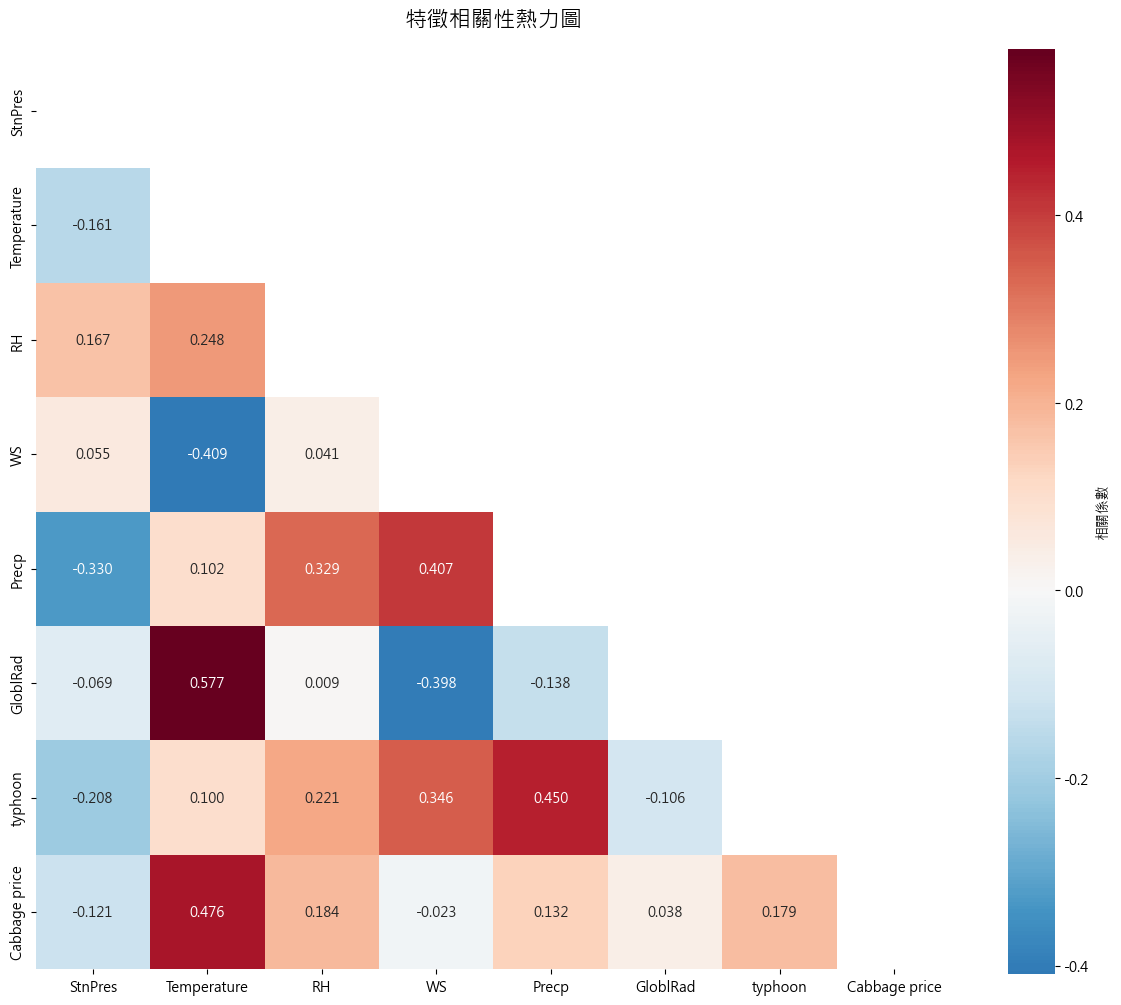

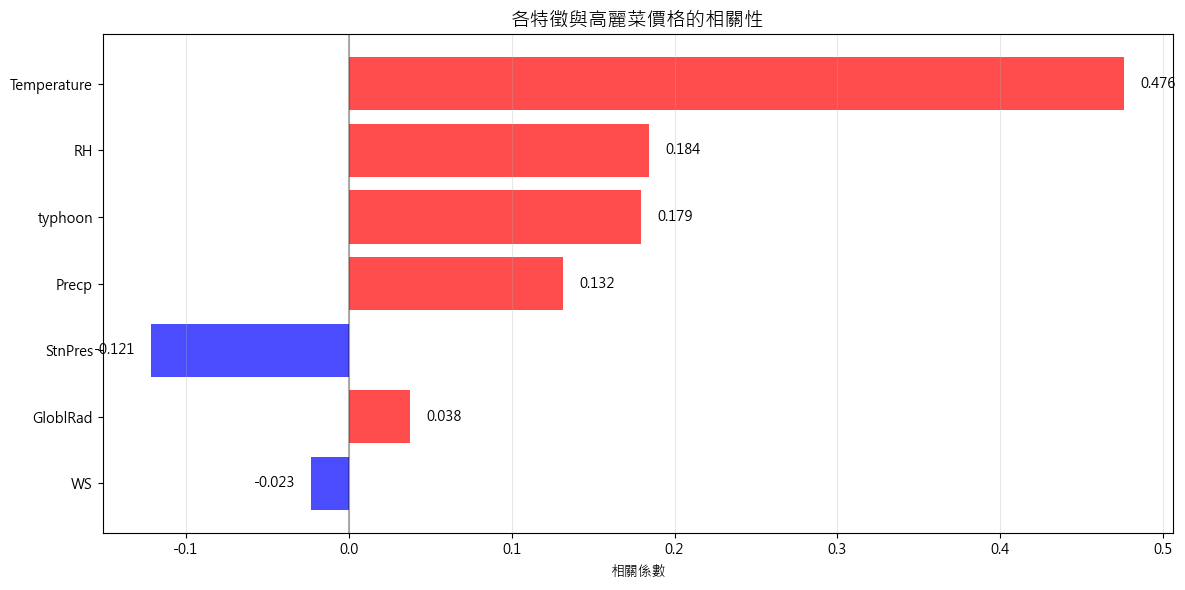

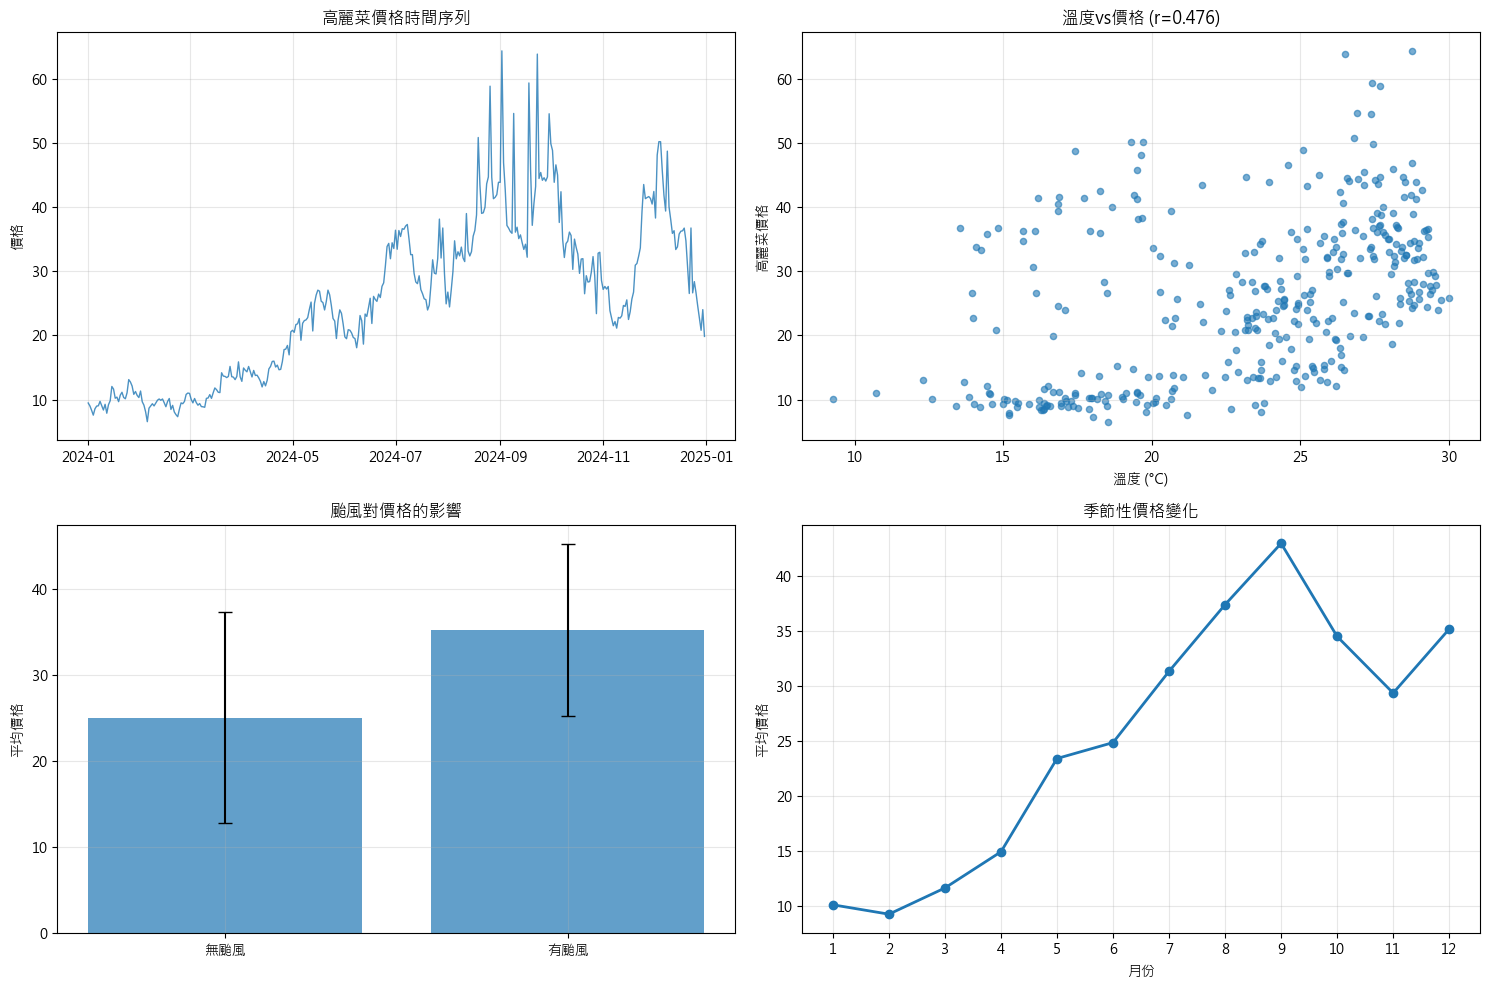

In [11]:
print("\n=== ÂâµÂª∫Ë¶ñË¶∫ÂåñÂúñË°® ===")

# 1. Áõ∏ÈóúÊÄßÁÜ±ÂäõÂúñ
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Áõ∏Èóú‰øÇÊï∏'})
plt.title('ÁâπÂæµÁõ∏ÈóúÊÄßÁÜ±ÂäõÂúñ', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. ËàáÂÉπÊ†ºÁõ∏ÈóúÊÄßÊ¢ùÂΩ¢Âúñ
plt.figure(figsize=(12, 6))
price_corr_abs = price_corr.abs().sort_values(ascending=True)
colors = ['red' if x > 0 else 'blue' for x in price_corr[price_corr_abs.index]]
bars = plt.barh(range(len(price_corr_abs)), price_corr[price_corr_abs.index], color=colors, alpha=0.7)

plt.yticks(range(len(price_corr_abs)), price_corr_abs.index)
plt.xlabel('Áõ∏Èóú‰øÇÊï∏')
plt.title('ÂêÑÁâπÂæµËàáÈ´òÈ∫óËèúÂÉπÊ†ºÁöÑÁõ∏ÈóúÊÄß', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Ê∑ªÂä†Êï∏ÂÄºÊ®ôÁ±§
for i, (bar, value) in enumerate(zip(bars, price_corr[price_corr_abs.index])):
    plt.text(value + 0.01 if value > 0 else value - 0.01, 
             i, f'{value:.3f}', 
             va='center', ha='left' if value > 0 else 'right')

plt.tight_layout()
plt.show()

# 3. ÂÉπÊ†ºÊôÇÈñìÂ∫èÂàóÂúñ
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# ÂÉπÊ†ºÊôÇÈñìÂ∫èÂàó
axes[0,0].plot(df['ObsTime'], df['Cabbage price'], linewidth=1, alpha=0.8)
axes[0,0].set_title('È´òÈ∫óËèúÂÉπÊ†ºÊôÇÈñìÂ∫èÂàó')
axes[0,0].set_ylabel('ÂÉπÊ†º')
axes[0,0].grid(True, alpha=0.3)

# Ê∫´Â∫¶vsÂÉπÊ†º
axes[0,1].scatter(df['Temperature'], df['Cabbage price'], alpha=0.6, s=20)
axes[0,1].set_xlabel('Ê∫´Â∫¶ (¬∞C)')
axes[0,1].set_ylabel('È´òÈ∫óËèúÂÉπÊ†º')
axes[0,1].set_title(f'Ê∫´Â∫¶vsÂÉπÊ†º (r={corr_matrix.loc["Temperature", "Cabbage price"]:.3f})')
axes[0,1].grid(True, alpha=0.3)

# È¢±È¢®ÂΩ±Èüø
typhoon_price = df.groupby('typhoon')['Cabbage price'].agg(['mean', 'std']).reset_index()
axes[1,0].bar(['ÁÑ°È¢±È¢®', 'ÊúâÈ¢±È¢®'], typhoon_price['mean'], 
              yerr=typhoon_price['std'], capsize=5, alpha=0.7)
axes[1,0].set_title('È¢±È¢®Â∞çÂÉπÊ†ºÁöÑÂΩ±Èüø')
axes[1,0].set_ylabel('Âπ≥ÂùáÂÉπÊ†º')
axes[1,0].grid(True, alpha=0.3)

# Â≠£ÁØÄÊÄßÂàÜÊûê
seasonal_price = df.groupby('month')['Cabbage price'].mean()
axes[1,1].plot(seasonal_price.index, seasonal_price.values, marker='o', linewidth=2)
axes[1,1].set_xlabel('Êúà‰ªΩ')
axes[1,1].set_ylabel('Âπ≥ÂùáÂÉπÊ†º')
axes[1,1].set_title('Â≠£ÁØÄÊÄßÂÉπÊ†ºËÆäÂåñ')
axes[1,1].set_xticks(range(1, 13))
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# =============================================================================
# Â§öÈáçÂÖ±Á∑öÊÄßÊ™¢Ê∏¨
# =============================================================================

print("\n=== Â§öÈáçÂÖ±Á∑öÊÄßÊ™¢Ê∏¨ ===")

# ÊâæÂá∫Âº∑Áõ∏ÈóúÁöÑÁâπÂæµÂ∞ç (ÊéíÈô§ËàáÁõÆÊ®ôËÆäÊï∏ÁöÑÁõ∏ÈóúÊÄß)
strong_correlations = []
feature_cols = [col for col in original_features if col != 'Cabbage price']

for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        corr_val = corr_matrix.loc[feature_cols[i], feature_cols[j]]
        if abs(corr_val) > 0.4:  # ÈñæÂÄºÂèØË™øÊï¥
            strong_correlations.append({
                'feature1': feature_cols[i],
                'feature2': feature_cols[j],
                'correlation': corr_val
            })

if strong_correlations:
    print("ÁôºÁèæÁöÑÂ§öÈáçÂÖ±Á∑öÊÄßÂïèÈ°å (|r| > 0.4):")
    for item in sorted(strong_correlations, key=lambda x: abs(x['correlation']), reverse=True):
        print(f"{item['feature1']} - {item['feature2']}: {item['correlation']:.3f}")
else:
    print("Êú™ÁôºÁèæÂö¥ÈáçÁöÑÂ§öÈáçÂÖ±Á∑öÊÄßÂïèÈ°å")


=== Â§öÈáçÂÖ±Á∑öÊÄßÊ™¢Ê∏¨ ===
ÁôºÁèæÁöÑÂ§öÈáçÂÖ±Á∑öÊÄßÂïèÈ°å (|r| > 0.4):
Temperature - GloblRad: 0.577
Precp - typhoon: 0.450
Temperature - WS: -0.409
WS - Precp: 0.407


In [13]:
# =============================================================================
# ÁâπÂæµÈáçË¶ÅÊÄßË©ï‰º∞
# =============================================================================

print("\n=== ÁâπÂæµÈáçË¶ÅÊÄßË©ï‰º∞ ===")

# Âü∫ÊñºÁõ∏ÈóúÊÄßÁöÑÁâπÂæµÈáçË¶ÅÊÄß
feature_importance = []
for feature in feature_cols:
    corr_with_target = abs(corr_matrix.loc[feature, 'Cabbage price'])
    feature_importance.append({
        'feature': feature,
        'abs_correlation': corr_with_target,
        'correlation': corr_matrix.loc[feature, 'Cabbage price']
    })

# ÊéíÂ∫è
feature_importance.sort(key=lambda x: x['abs_correlation'], reverse=True)

print("ÁâπÂæµÈáçË¶ÅÊÄßÊéíÂ∫è (Âü∫ÊñºËàáÁõÆÊ®ôËÆäÊï∏ÁöÑÁõ∏ÈóúÊÄß):")
print("-" * 50)
for i, item in enumerate(feature_importance, 1):
    stars = "‚òÖ" * min(5, int(item['abs_correlation'] * 10)) + "‚òÜ" * (5 - min(5, int(item['abs_correlation'] * 10)))
    direction = "‚Üó" if item['correlation'] > 0 else "‚Üò"
    print(f"{i:2d}. {item['feature']:12} {item['correlation']:6.3f} {direction} {stars}")


=== ÁâπÂæµÈáçË¶ÅÊÄßË©ï‰º∞ ===
ÁâπÂæµÈáçË¶ÅÊÄßÊéíÂ∫è (Âü∫ÊñºËàáÁõÆÊ®ôËÆäÊï∏ÁöÑÁõ∏ÈóúÊÄß):
--------------------------------------------------
 1. Temperature   0.476 ‚Üó ‚òÖ‚òÖ‚òÖ‚òÖ‚òÜ
 2. RH            0.184 ‚Üó ‚òÖ‚òÜ‚òÜ‚òÜ‚òÜ
 3. typhoon       0.179 ‚Üó ‚òÖ‚òÜ‚òÜ‚òÜ‚òÜ
 4. Precp         0.132 ‚Üó ‚òÖ‚òÜ‚òÜ‚òÜ‚òÜ
 5. StnPres      -0.121 ‚Üò ‚òÖ‚òÜ‚òÜ‚òÜ‚òÜ
 6. GloblRad      0.038 ‚Üó ‚òÜ‚òÜ‚òÜ‚òÜ‚òÜ
 7. WS           -0.023 ‚Üò ‚òÜ‚òÜ‚òÜ‚òÜ‚òÜ


In [14]:
# =============================================================================
# ÁâπÂæµÈÅ∏ÊìáÂª∫Ë≠∞
# =============================================================================

print("\n=== ÁâπÂæµÈÅ∏ÊìáÂª∫Ë≠∞ ===")

# Âü∫ÊñºÁõ∏ÈóúÊÄßÂíåÂ§öÈáçÂÖ±Á∑öÊÄßÁöÑÂª∫Ë≠∞
recommendations = {
    'keep_high': [],      # È´òÁõ∏ÈóúÊÄßÔºåÂøÖÈ†à‰øùÁïô
    'keep_medium': [],    # ‰∏≠Á≠âÁõ∏ÈóúÊÄßÔºåÂª∫Ë≠∞‰øùÁïô
    'consider': [],       # ‰ΩéÁõ∏ÈóúÊÄßÔºåÂèØËÄÉÊÖÆ
    'remove': []          # Âæà‰ΩéÁõ∏ÈóúÊÄßÊàñÂ§öÈáçÂÖ±Á∑öÊÄßÔºåÂª∫Ë≠∞ÁßªÈô§
}

for item in feature_importance:
    abs_corr = item['abs_correlation']
    feature = item['feature']
    
    if abs_corr >= 0.3:
        recommendations['keep_high'].append(feature)
    elif abs_corr >= 0.15:
        recommendations['keep_medium'].append(feature)
    elif abs_corr >= 0.05:
        recommendations['consider'].append(feature)
    else:
        recommendations['remove'].append(feature)

# ËôïÁêÜÂ§öÈáçÂÖ±Á∑öÊÄß
multicollinear_features = set()
if strong_correlations:
    for item in strong_correlations:
        # ‰øùÁïôËàáÁõÆÊ®ôËÆäÊï∏Áõ∏ÈóúÊÄßÊõ¥È´òÁöÑÁâπÂæµ
        corr1 = abs(corr_matrix.loc[item['feature1'], 'Cabbage price'])
        corr2 = abs(corr_matrix.loc[item['feature2'], 'Cabbage price'])
        
        if corr1 > corr2:
            multicollinear_features.add(item['feature2'])
        else:
            multicollinear_features.add(item['feature1'])

# Êõ¥Êñ∞Âª∫Ë≠∞
for feature in multicollinear_features:
    for category in recommendations:
        if feature in recommendations[category]:
            recommendations[category].remove(feature)
    recommendations['remove'].append(feature)

print("üéØ Ê†∏ÂøÉÁâπÂæµ (ÂøÖÈ†à‰øùÁïô):")
for feature in recommendations['keep_high']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    print(f"   ‚Ä¢ {feature} (r={corr_val:.3f})")

print("\nüìä ÈáçË¶ÅÁâπÂæµ (Âª∫Ë≠∞‰øùÁïô):")
for feature in recommendations['keep_medium']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    print(f"   ‚Ä¢ {feature} (r={corr_val:.3f})")

print("\nü§î Ê¨°Ë¶ÅÁâπÂæµ (ÂèØËÄÉÊÖÆ):")
for feature in recommendations['consider']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    print(f"   ‚Ä¢ {feature} (r={corr_val:.3f})")

print("\n‚ùå Âª∫Ë≠∞ÁßªÈô§ÁâπÂæµ:")
for feature in recommendations['remove']:
    corr_val = corr_matrix.loc[feature, 'Cabbage price']
    reason = "Â§öÈáçÂÖ±Á∑öÊÄß" if feature in multicollinear_features else "Áõ∏ÈóúÊÄßÊ•µ‰Ωé"
    print(f"   ‚Ä¢ {feature} (r={corr_val:.3f}) - {reason}")



=== ÁâπÂæµÈÅ∏ÊìáÂª∫Ë≠∞ ===
üéØ Ê†∏ÂøÉÁâπÂæµ (ÂøÖÈ†à‰øùÁïô):
   ‚Ä¢ Temperature (r=0.476)

üìä ÈáçË¶ÅÁâπÂæµ (Âª∫Ë≠∞‰øùÁïô):
   ‚Ä¢ RH (r=0.184)
   ‚Ä¢ typhoon (r=0.179)

ü§î Ê¨°Ë¶ÅÁâπÂæµ (ÂèØËÄÉÊÖÆ):
   ‚Ä¢ StnPres (r=-0.121)

‚ùå Âª∫Ë≠∞ÁßªÈô§ÁâπÂæµ:
   ‚Ä¢ WS (r=-0.023) - Â§öÈáçÂÖ±Á∑öÊÄß
   ‚Ä¢ Precp (r=0.132) - Â§öÈáçÂÖ±Á∑öÊÄß
   ‚Ä¢ GloblRad (r=0.038) - Â§öÈáçÂÖ±Á∑öÊÄß


In [15]:
# =============================================================================
# ÊúÄÁµÇÁâπÂæµÂ∑•Á®ãÊï∏ÊìöÈõÜ
# =============================================================================

print("\n=== ÊúÄÁµÇÁâπÂæµÂ∑•Á®ãÊï∏ÊìöÈõÜ ===")

# ÈÅ∏ÊìáÊúÄÁµÇÁâπÂæµ
final_features = (recommendations['keep_high'] + 
                 recommendations['keep_medium'] + 
                 recommendations['consider'])

# Ê∑ªÂä†Â∑•Á®ãÁâπÂæµ
engineered_features = [
    # ÊôÇÈñìÁâπÂæµ
    # 'month', 'season', 'month_sin', 'month_cos', 'dayofyear_sin', 'dayofyear_cos',
    # 'is_weekend',
    'month_sin', 'month_cos', 'dayofyear_sin', 'dayofyear_cos', 'is_weekend',
    
    # Ê∞£Ë±°Â∑•Á®ãÁâπÂæµ
    # 'temp_squared', 'is_hot', 'is_cold', 'humid_wind_interaction', 
    # 'has_rain', 'log_precp', 'extreme_weather',

    # Ê∞£Ë±°Â∑•Á®ãÁâπÂæµ
    'temp_squared', 'is_hot', 'is_cold', 'has_rain', 'log_precp', 'extreme_weather',
    
    # ÊªØÂæåÁâπÂæµ
    'price_lag_1', 'price_lag_3', 'price_lag_7',
    'Temperature_lag_1', 'Temperature_lag_3',
    
    # ÊªæÂãïÁµ±Ë®àÁâπÂæµ
    'price_ma_7', 'price_ma_14', 'temp_ma_7', 'rain_sum_7',
    'price_volatility_7d', 'price_trend_7d'
]

all_features = final_features + engineered_features + ['Cabbage price']

# ÂâµÂª∫ÊúÄÁµÇÊï∏ÊìöÈõÜ
df_final = df[all_features].copy()

print(f"ÊúÄÁµÇÊï∏ÊìöÈõÜÂΩ¢ÁãÄ: {df_final.shape}")
print(f"ÁâπÂæµÊï∏Èáè: {len(all_features) - 1}")  # Ê∏õÂéªÁõÆÊ®ôËÆäÊï∏

# Ê™¢Êü•Áº∫Â§±ÂÄºÔºà‰∏ªË¶Å‰æÜËá™ÊªØÂæåÂíåÊªæÂãïÁâπÂæµÔºâ
print(f"\nÁº∫Â§±ÂÄºÊÉÖÊ≥Å:")
missing_counts = df_final.isnull().sum()
missing_features = missing_counts[missing_counts > 0]
for feature, count in missing_features.items():
    print(f"   {feature}: {count} ({count/len(df_final)*100:.1f}%)")

# ÁßªÈô§Áº∫Â§±ÂÄºÈÅéÂ§öÁöÑË°åÔºàÈÄöÂ∏∏ÊòØÂâç30Â§©Ôºâ
df_clean = df_final.dropna()
print(f"\nÊ∏ÖÁêÜÂæåÊï∏ÊìöÈõÜÂΩ¢ÁãÄ: {df_clean.shape}")
print(f"‰øùÁïôÊï∏ÊìöÊØî‰æã: {len(df_clean)/len(df_final)*100:.1f}%")


=== ÊúÄÁµÇÁâπÂæµÂ∑•Á®ãÊï∏ÊìöÈõÜ ===
ÊúÄÁµÇÊï∏ÊìöÈõÜÂΩ¢ÁãÄ: (365, 27)
ÁâπÂæµÊï∏Èáè: 26

Áº∫Â§±ÂÄºÊÉÖÊ≥Å:
   price_lag_1: 1 (0.3%)
   price_lag_3: 3 (0.8%)
   price_lag_7: 7 (1.9%)
   Temperature_lag_1: 1 (0.3%)
   Temperature_lag_3: 3 (0.8%)
   price_ma_7: 6 (1.6%)
   price_ma_14: 13 (3.6%)
   temp_ma_7: 6 (1.6%)
   rain_sum_7: 6 (1.6%)
   price_volatility_7d: 6 (1.6%)
   price_trend_7d: 6 (1.6%)

Ê∏ÖÁêÜÂæåÊï∏ÊìöÈõÜÂΩ¢ÁãÄ: (352, 27)
‰øùÁïôÊï∏ÊìöÊØî‰æã: 96.4%


In [16]:
# =============================================================================
# Ê®°ÂûãÊ∫ñÂÇôÂª∫Ë≠∞
# =============================================================================

print("\n=== Ê®°ÂûãÊ∫ñÂÇôÂª∫Ë≠∞ ===")

print("üîß ÁâπÂæµÂ∑•Á®ãÂÆåÊàêÈ†ÖÁõÆ:")
print("   ‚úÖ ÊôÇÈñìÁâπÂæµÊèêÂèñÔºàÂ≠£ÁØÄÊÄß„ÄÅÈÄ±ÊúüÊÄßÔºâ")
print("   ‚úÖ Ê∞£Ë±°ÁâπÂæµÂ¢ûÂº∑ÔºàÈùûÁ∑öÊÄß„ÄÅ‰∫§‰∫í‰ΩúÁî®Ôºâ")
print("   ‚úÖ ÊªØÂæåÁâπÂæµÂâµÂª∫ÔºàÊçïÊçâÊôÇÈñì‰æùË≥¥ÊÄßÔºâ")
print("   ‚úÖ ÊªæÂãïÁµ±Ë®àÁâπÂæµÔºàË∂®Âã¢ÂíåÊ≥¢ÂãïÊÄßÔºâ")
print("   ‚úÖ Ê•µÁ´Ø‰∫ã‰ª∂ÁâπÂæµÔºàÈ¢±È¢®„ÄÅÊ•µÁ´ØÂ§©Ê∞£Ôºâ")
print("   ‚úÖ Â§öÈáçÂÖ±Á∑öÊÄßËôïÁêÜ")

print("\nüìä Âª∫Ë≠∞ÁöÑÂª∫Ê®°ÊµÅÁ®ã:")
print("   1. ÊôÇÈñìÂ∫èÂàóÂàÜÂâ≤ÔºàÈÅøÂÖçÊï∏ÊìöÊ¥©Èú≤Ôºâ")
print("   2. ÁâπÂæµÊ®ôÊ∫ñÂåñ/Ê≠£Ë¶èÂåñ")
print("   3. ÁâπÂæµÈÅ∏ÊìáÈ©óË≠â")
print("   4. Ê®°ÂûãË®ìÁ∑¥ËàáÈ©óË≠â")

print("\nüéØ Êé®Ëñ¶Ê®°Âûã:")
print("   ‚Ä¢ XGBoost/LightGBM (ËôïÁêÜÈùûÁ∑öÊÄßÂíåÁâπÂæµ‰∫§‰∫í)")
print("   ‚Ä¢ Random Forest (Á©©ÂÅ•ÊÄßÂ•Ω)")
print("   ‚Ä¢ LSTM/GRU (ÊôÇÈñìÂ∫èÂàóÁâπÊÄß)")
print("   ‚Ä¢ Prophet (Â≠£ÁØÄÊÄßÂíåË∂®Âã¢)")

print("\nüíæ Êï∏Êìö‰øùÂ≠ò")
# ‰øùÂ≠òÊ∏ÖÁêÜÂæåÁöÑÊï∏Êìö
df_clean.to_csv('cabbage_price_engineered.csv', index=False, encoding='utf-8-sig')
print("   ‚úÖ ÁâπÂæµÂ∑•Á®ãÊï∏ÊìöÂ∑≤‰øùÂ≠òÁÇ∫ 'cabbage_price_engineered.csv'")

print("\nüéâ ÁâπÂæµÂ∑•Á®ãËàáÁõ∏ÈóúÊÄßÂàÜÊûêÂÆåÊàêÔºÅ")


=== Ê®°ÂûãÊ∫ñÂÇôÂª∫Ë≠∞ ===
üîß ÁâπÂæµÂ∑•Á®ãÂÆåÊàêÈ†ÖÁõÆ:
   ‚úÖ ÊôÇÈñìÁâπÂæµÊèêÂèñÔºàÂ≠£ÁØÄÊÄß„ÄÅÈÄ±ÊúüÊÄßÔºâ
   ‚úÖ Ê∞£Ë±°ÁâπÂæµÂ¢ûÂº∑ÔºàÈùûÁ∑öÊÄß„ÄÅ‰∫§‰∫í‰ΩúÁî®Ôºâ
   ‚úÖ ÊªØÂæåÁâπÂæµÂâµÂª∫ÔºàÊçïÊçâÊôÇÈñì‰æùË≥¥ÊÄßÔºâ
   ‚úÖ ÊªæÂãïÁµ±Ë®àÁâπÂæµÔºàË∂®Âã¢ÂíåÊ≥¢ÂãïÊÄßÔºâ
   ‚úÖ Ê•µÁ´Ø‰∫ã‰ª∂ÁâπÂæµÔºàÈ¢±È¢®„ÄÅÊ•µÁ´ØÂ§©Ê∞£Ôºâ
   ‚úÖ Â§öÈáçÂÖ±Á∑öÊÄßËôïÁêÜ

üìä Âª∫Ë≠∞ÁöÑÂª∫Ê®°ÊµÅÁ®ã:
   1. ÊôÇÈñìÂ∫èÂàóÂàÜÂâ≤ÔºàÈÅøÂÖçÊï∏ÊìöÊ¥©Èú≤Ôºâ
   2. ÁâπÂæµÊ®ôÊ∫ñÂåñ/Ê≠£Ë¶èÂåñ
   3. ÁâπÂæµÈÅ∏ÊìáÈ©óË≠â
   4. Ê®°ÂûãË®ìÁ∑¥ËàáÈ©óË≠â

üéØ Êé®Ëñ¶Ê®°Âûã:
   ‚Ä¢ XGBoost/LightGBM (ËôïÁêÜÈùûÁ∑öÊÄßÂíåÁâπÂæµ‰∫§‰∫í)
   ‚Ä¢ Random Forest (Á©©ÂÅ•ÊÄßÂ•Ω)
   ‚Ä¢ LSTM/GRU (ÊôÇÈñìÂ∫èÂàóÁâπÊÄß)
   ‚Ä¢ Prophet (Â≠£ÁØÄÊÄßÂíåË∂®Âã¢)

üíæ Êï∏Êìö‰øùÂ≠ò
   ‚úÖ ÁâπÂæµÂ∑•Á®ãÊï∏ÊìöÂ∑≤‰øùÂ≠òÁÇ∫ 'cabbage_price_engineered.csv'

üéâ ÁâπÂæµÂ∑•Á®ãËàáÁõ∏ÈóúÊÄßÂàÜÊûêÂÆåÊàêÔºÅ


In [17]:
# 1. ËºâÂÖ•Êï∏Êìö
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ËºâÂÖ•ÁôΩËèúÂÉπÊ†ºÊï∏Êìö
df = pd.read_csv('cabbage_price_engineered.csv')

# ÂàÜÈõ¢ÁâπÂæµÂíåÁõÆÊ®ôËÆäÈáè
X = df.drop('Cabbage price', axis=1)
y = df['Cabbage price']

# # 2. ÁâπÂæµÊ®ôÊ∫ñÂåñ (ÈùûÂ∏∏ÈáçË¶ÅÔºÅ)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 4. ÂÆöÁæ©È°ûÂà•ÂûãÊ¨Ñ‰ΩçÔºà‰∏çÈÄ≤Ë°åÊ®ôÊ∫ñÂåñÔºâ
categorical_cols = ['typhoon', 'is_weekend', 'is_hot', 'is_cold', 'has_rain', 'extreme_weather']

# 5. ÂÖ∂È§òÊ¨Ñ‰ΩçÈÄ≤Ë°åÊ®ôÊ∫ñÂåñ
numerical_cols = [col for col in X.columns if col not in categorical_cols]
X_cat_encoded = pd.get_dummies(X[categorical_cols], drop_first=False)  # ‰∏ç‰∏üÊ£Ñ‰ªª‰ΩïÈ°ûÂà•

# 6. ÁâπÂæµÊ®ôÊ∫ñÂåñ
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[numerical_cols])
X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_cols, index=X.index)

# 7. Âêà‰ΩµÊ®ôÊ∫ñÂåñÊï∏ÂÄºÊ¨Ñ‰ΩçËàáÂéüÂßãÈ°ûÂà•Ê¨Ñ‰Ωç
# X_processed = pd.concat([
#     pd.DataFrame(X_num_scaled, columns=numerical_cols, index=X.index),
#     X[categorical_cols].reset_index(drop=True)
# ], axis=1)

X_processed = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

print(f"ÂéüÂßãÁâπÂæµÊï∏: {X.shape[1]}")
print(f"One-Hot Encoding ÂæåÁâπÂæµÊï∏: {X_processed.shape[1]}")
print(f"Ê®£Êú¨Êï∏: {X.shape[0]}")

ÂéüÂßãÁâπÂæµÊï∏: 26
One-Hot Encoding ÂæåÁâπÂæµÊï∏: 26
Ê®£Êú¨Êï∏: 352


In [18]:
print("=== È°ûÂà•Ê¨Ñ‰ΩçÂîØ‰∏ÄÂÄºÊï∏Èáè ===")
for col in categorical_cols:
    unique_vals = X[col].nunique()
    print(f"{col}: {unique_vals} È°ûÂà•")


=== È°ûÂà•Ê¨Ñ‰ΩçÂîØ‰∏ÄÂÄºÊï∏Èáè ===
typhoon: 2 È°ûÂà•
is_weekend: 2 È°ûÂà•
is_hot: 2 È°ûÂà•
is_cold: 2 È°ûÂà•
has_rain: 2 È°ûÂà•
extreme_weather: 2 È°ûÂà•


In [19]:
# 1. ÊôÇÈñìÈ†ÜÂ∫èÂàáÂàÜ
split_index = int(len(X) * 0.8)

X_train = X.iloc[:split_index].copy()
X_test  = X.iloc[split_index:].copy()
y_train = y.iloc[:split_index].copy()
y_test  = y.iloc[split_index:].copy()

# 2. ÂÆöÁæ©Ê¨Ñ‰Ωç
categorical_cols = ['typhoon', 'is_weekend', 'is_hot', 'is_cold', 'has_rain', 'extreme_weather']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# 3. Êï∏ÂÄºÊ¨Ñ‰ΩçÊ®ôÊ∫ñÂåñÔºàÂè™Áî®Ë®ìÁ∑¥ÈõÜ fitÔºâ
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numerical_cols]),
    columns=numerical_cols, index=X_train.index
)
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test[numerical_cols]),
    columns=numerical_cols, index=X_test.index
)

# 4. È°ûÂà•Ê¨Ñ‰Ωç one-hotÔºàÊ≥®ÊÑè‰øùÊåÅÁõ∏ÂêåÊ¨Ñ‰ΩçÔºâ
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=False)
X_test_cat  = pd.get_dummies(X_test[categorical_cols], drop_first=False)

# Â∞çÈΩäÊ¨Ñ‰ΩçÔºàÈò≤Ê≠¢Êüê‰∫õÈ°ûÂà•Âú®Ê∏¨Ë©¶ÈõÜ‰∏≠Áº∫Â§±Ôºâ
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

# 5. Âêà‰ΩµËôïÁêÜÂæåÁâπÂæµ
X_train_processed = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test_processed  = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

print(f"Ë®ìÁ∑¥ÈõÜÁâπÂæµÊï∏: {X_train_processed.shape[1]}")
print(f"Ê∏¨Ë©¶ÈõÜÁâπÂæµÊï∏: {X_test_processed.shape[1]}")


Ë®ìÁ∑¥ÈõÜÁâπÂæµÊï∏: 26
Ê∏¨Ë©¶ÈõÜÁâπÂæµÊï∏: 26



=== Ê®°ÂûãÊÄßËÉΩË©ï‰º∞ ===
Ë®ìÁ∑¥ÈõÜ R¬≤: 0.9895
Ê∏¨Ë©¶ÈõÜ R¬≤: 0.9212
Ë®ìÁ∑¥ÈõÜ RMSE: 1.2856
Ê∏¨Ë©¶ÈõÜ RMSE: 2.2241


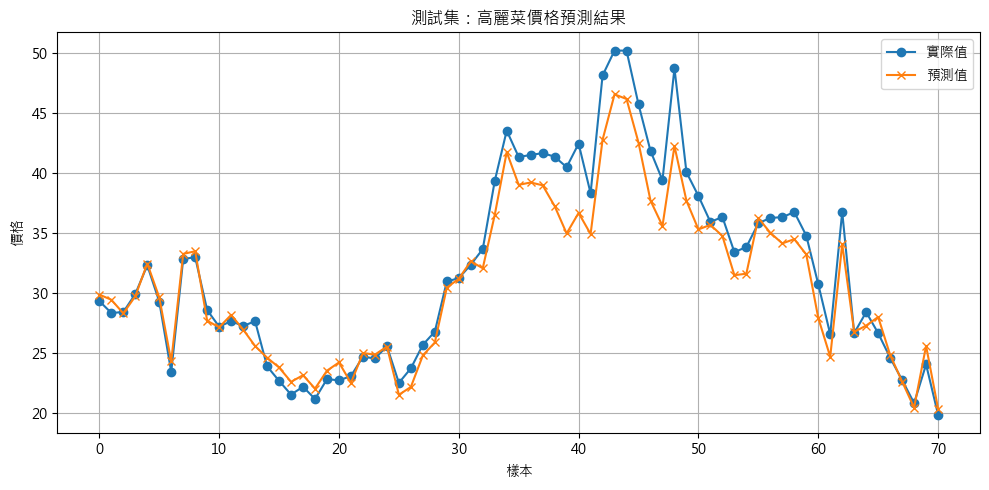

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ==========================================
# 1. ËÆÄÂèñË≥áÊñô‰∏¶ÊéíÂ∫èÔºàÂ¶ÇÊûúÊúâÊôÇÈñìÊ¨Ñ‰Ωç ObsTimeÔºâ
# ==========================================
df = pd.read_csv('cabbage_price_engineered.csv')
# df = df.sort_values("ObsTime")  # Â¶ÇÊûú‰Ω†ÊúâÊôÇÈñìÊ¨Ñ‰ΩçË´ãÂèñÊ∂àË®ªËß£ÈÄôË°å

# 2. ÂàÜÈõ¢ÁâπÂæµËàáÁõÆÊ®ô
X = df.drop(columns=["Cabbage price"])
y = df["Cabbage price"]

# 3. ÂÆöÁæ©È°ûÂà•Ê¨Ñ‰ΩçÔºà‰∏çÈÄ≤Ë°åÊ®ôÊ∫ñÂåñÔºâ
categorical_cols = ['typhoon', 'is_weekend', 'is_hot', 'is_cold', 'has_rain', 'extreme_weather']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# ==========================================
# 4. ÊôÇÈñìÂ∫èÂàóÂàáÂàÜÔºàÂâç80%ÁÇ∫Ë®ìÁ∑¥ÈõÜÔºâ
# ==========================================
split_index = int(len(X) * 0.8)
X_train_raw = X.iloc[:split_index].copy()
X_test_raw  = X.iloc[split_index:].copy()
y_train     = y.iloc[:split_index].copy()
y_test      = y.iloc[split_index:].copy()

# ==========================================
# 5. Êï∏ÂÄºÊ¨Ñ‰ΩçÊ®ôÊ∫ñÂåñÔºàÂè™Áî®Ë®ìÁ∑¥ÈõÜ fitÔºâ
# ==========================================
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train_raw[numerical_cols]),
    columns=numerical_cols, index=X_train_raw.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test_raw[numerical_cols]),
    columns=numerical_cols, index=X_test_raw.index
)

# ==========================================
# 6. È°ûÂà•Ê¨Ñ‰Ωç One-Hot Á∑®Á¢ºÔºàÈÅøÂÖçÊ¥©ÊºèÔºâ
# ==========================================
X_train_cat = pd.get_dummies(X_train_raw[categorical_cols], drop_first=False)
X_test_cat = pd.get_dummies(X_test_raw[categorical_cols], drop_first=False)

# Á¢∫‰øùÊ∏¨Ë©¶ÈõÜÊ¨Ñ‰ΩçÂ∞çÈΩä
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

# ==========================================
# 7. Âêà‰ΩµËôïÁêÜÂæåÁâπÂæµ
# ==========================================
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

# ==========================================
# 8. PCAÔºàÂè™Â∞çË®ìÁ∑¥Ë≥áÊñôÂÅö fitÔºâ
# ==========================================
optimal_components = 10  # ‚úÖ ÂèØËá™Ë°åË™øÊï¥ÊàñÊîπÁÇ∫Ëá™ÂãïÊ±∫ÂÆö
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca  = pca.transform(X_test_processed)

# ==========================================
# 9. Ê®°ÂûãË®ìÁ∑¥ËàáÈ†êÊ∏¨
# ==========================================
model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# ==========================================
# 10. Ê®°ÂûãÊÄßËÉΩË©ï‰º∞
# ==========================================
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n=== Ê®°ÂûãÊÄßËÉΩË©ï‰º∞ ===")
print(f"Ë®ìÁ∑¥ÈõÜ R¬≤: {train_r2:.4f}")
print(f"Ê∏¨Ë©¶ÈõÜ R¬≤: {test_r2:.4f}")
print(f"Ë®ìÁ∑¥ÈõÜ RMSE: {train_rmse:.4f}")
print(f"Ê∏¨Ë©¶ÈõÜ RMSE: {test_rmse:.4f}")

# ==========================================
# 11. È†êÊ∏¨ÁµêÊûúÂèØË¶ñÂåñ
# ==========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="ÂØ¶ÈöõÂÄº", marker='o')
plt.plot(y_pred_test, label="È†êÊ∏¨ÂÄº", marker='x')
plt.title("Ê∏¨Ë©¶ÈõÜÔºöÈ´òÈ∫óËèúÂÉπÊ†ºÈ†êÊ∏¨ÁµêÊûú")
plt.xlabel("Ê®£Êú¨")
plt.ylabel("ÂÉπÊ†º")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Ëá™ÂãïÈÅ∏Êìá‰øùÁïô 95% ÁöÑ‰∏ªÊàêÂàÜÊï∏
pca_full = PCA().fit(X_train_processed)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
optimal_components = np.argmax(cum_var >= 0.95) + 1
print(f"‰øùÁïô 95% ËÆäÁï∞ÈáèÊâÄÈúÄ‰∏ªÊàêÂàÜÊï∏: {optimal_components}")


‰øùÁïô 95% ËÆäÁï∞ÈáèÊâÄÈúÄ‰∏ªÊàêÂàÜÊï∏: 10


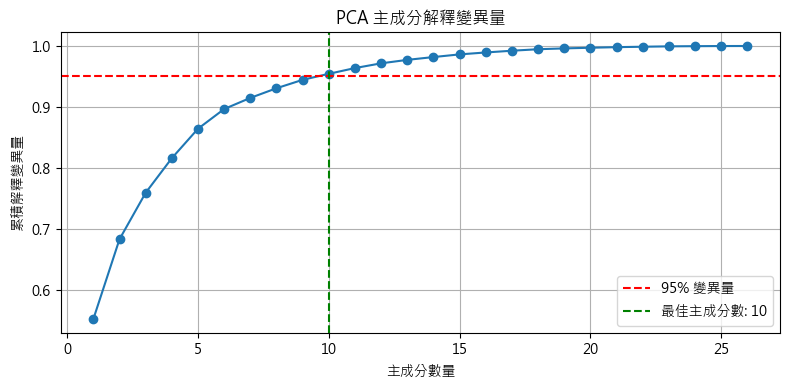

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% ËÆäÁï∞Èáè')
plt.axvline(x=optimal_components, color='green', linestyle='--', label=f'ÊúÄ‰Ω≥‰∏ªÊàêÂàÜÊï∏: {optimal_components}')
plt.xlabel('‰∏ªÊàêÂàÜÊï∏Èáè')
plt.ylabel('Á¥ØÁ©çËß£ÈáãËÆäÁï∞Èáè')
plt.title('PCA ‰∏ªÊàêÂàÜËß£ÈáãËÆäÁï∞Èáè')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


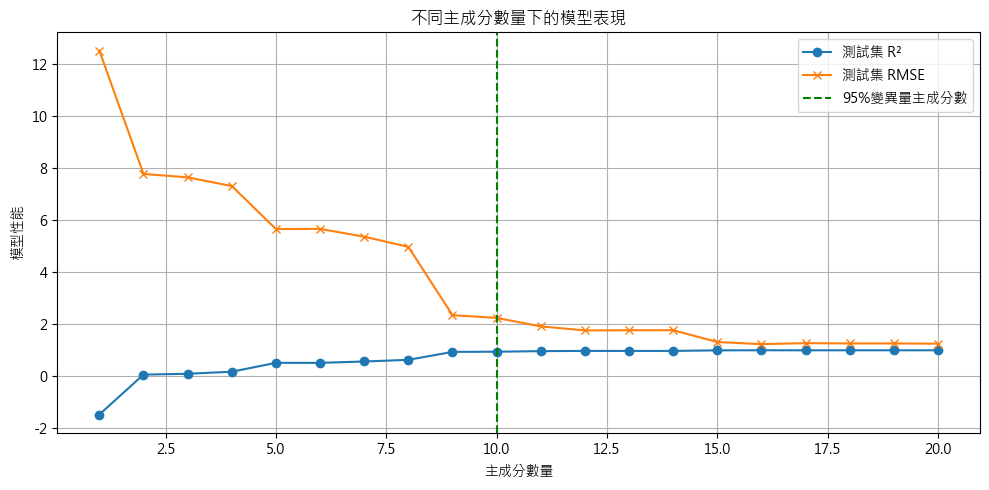

In [23]:
component_range = range(1, 21)
r2_scores = []
rmse_scores = []

for n in component_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_processed)
    X_test_pca = pca.transform(X_test_processed)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Áï´Âúñ
plt.figure(figsize=(10, 5))
plt.plot(component_range, r2_scores, marker='o', label='Ê∏¨Ë©¶ÈõÜ R¬≤')
plt.plot(component_range, rmse_scores, marker='x', label='Ê∏¨Ë©¶ÈõÜ RMSE')
plt.axvline(x=optimal_components, color='green', linestyle='--', label='95%ËÆäÁï∞Èáè‰∏ªÊàêÂàÜÊï∏')
plt.xlabel('‰∏ªÊàêÂàÜÊï∏Èáè')
plt.ylabel('Ê®°ÂûãÊÄßËÉΩ')
plt.title('‰∏çÂêå‰∏ªÊàêÂàÜÊï∏Èáè‰∏ãÁöÑÊ®°ÂûãË°®Áèæ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


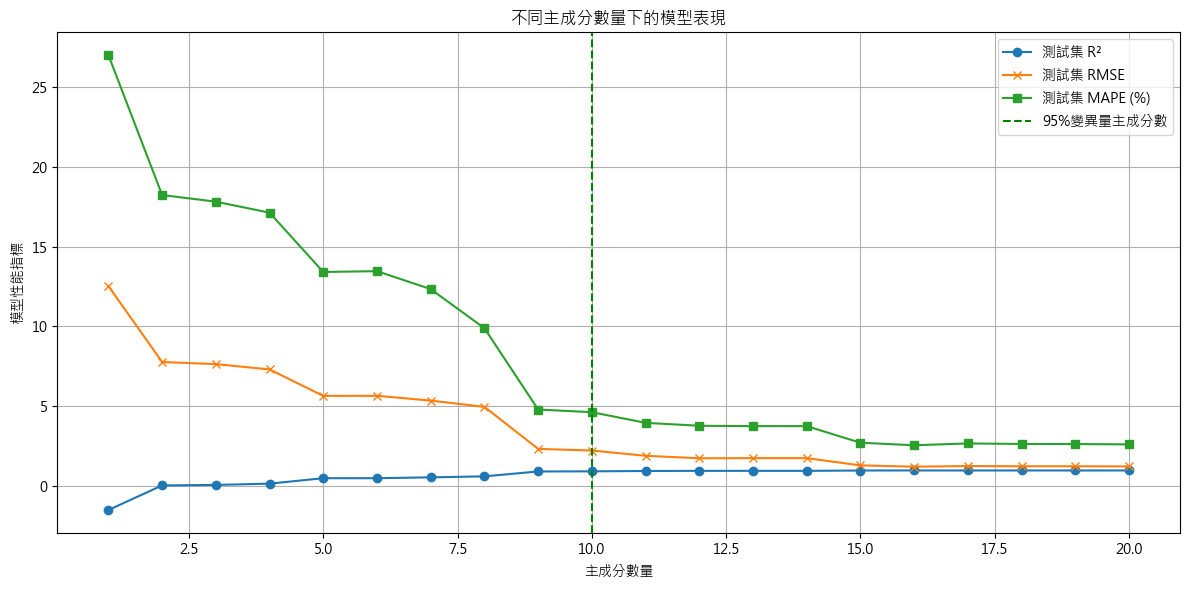

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

component_range = range(1, 21)
r2_scores = []
rmse_scores = []
mape_scores = []

for n in component_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_processed)
    X_test_pca = pca.transform(X_test_processed)

    model = LinearRegression()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred) * 100)  # ÁôæÂàÜÊØî%

# Áï´Âúñ
plt.figure(figsize=(12, 6))

plt.plot(component_range, r2_scores, marker='o', label='Ê∏¨Ë©¶ÈõÜ R¬≤')
plt.plot(component_range, rmse_scores, marker='x', label='Ê∏¨Ë©¶ÈõÜ RMSE')
plt.plot(component_range, mape_scores, marker='s', label='Ê∏¨Ë©¶ÈõÜ MAPE (%)')

plt.axvline(x=optimal_components, color='green', linestyle='--', label='95%ËÆäÁï∞Èáè‰∏ªÊàêÂàÜÊï∏')
plt.xlabel('‰∏ªÊàêÂàÜÊï∏Èáè')
plt.ylabel('Ê®°ÂûãÊÄßËÉΩÊåáÊ®ô')
plt.title('‰∏çÂêå‰∏ªÊàêÂàÜÊï∏Èáè‰∏ãÁöÑÊ®°ÂûãË°®Áèæ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# ==========================================
# 11. ÂàÜÊûê‰∏ªÊàêÂàÜÁöÑÊßãÊàêÔºàÊØèÂÄã‰∏ªÊàêÂàÜÂ∞çÊáâÂì™‰∫õÂéüÂßãÁâπÂæµÔºâ
# ==========================================
def analyze_component_composition(pca, feature_names, component_idx=0, top_n=10):
    """
    ÂàÜÊûêÊåáÂÆö‰∏ªÊàêÂàÜÁî±Âì™‰∫õÂéüÂßãÁâπÂæµÊßãÊàê
    :param pca: Â∑≤Ë®ìÁ∑¥Â•ΩÁöÑ PCA Ê®°Âûã
    :param feature_names: ÂéüÂßãÊ¨Ñ‰ΩçÂêçÁ®±ÔºàÂª∫Ë≠∞Áî® X_train_processed.columnsÔºâ
    :param component_idx: Ë¶ÅÂàÜÊûêÁöÑ‰∏ªÊàêÂàÜÁ∑®ËôüÔºàÂæû0ÈñãÂßãÔºâ
    :param top_n: È°ØÁ§∫Ê¨äÈáçÁµïÂ∞çÂÄºÊúÄÂ§ßÁöÑÂâçNÂÄãÁâπÂæµ
    """
    component = pca.components_[component_idx]
    feature_importance = [(abs(weight), feature, weight)
                          for weight, feature in zip(component, feature_names)]
    feature_importance.sort(reverse=True)

    print(f"\nüîç ‰∏ªÊàêÂàÜ PC{component_idx+1} ÁöÑ‰∏ªË¶ÅÊßãÊàêÁâπÂæµ (Ââç {top_n} Âêç):")
    for i, (abs_weight, feature, weight) in enumerate(feature_importance[:top_n]):
        print(f"{i+1:2d}. {feature:30s}: {weight:8.4f} (|{abs_weight:.4f}|)")

# ‚úÖ ‰ΩøÁî®ËôïÁêÜÂæåÁöÑÊ¨Ñ‰ΩçÂêçÁ®±ÈÄ≤Ë°åÂàÜÊûê
for i in range(min(10, optimal_components)):  # Âè™ÂàÜÊûêÂâç5ÂÄã‰∏ªÊàêÂàÜÔºàÊàñ‰Ω†ÂØ¶Èöõ‰øùÁïôÁöÑÊï∏ÈáèÔºâ
    analyze_component_composition(pca, X_train_processed.columns, i, top_n=10)



üîç ‰∏ªÊàêÂàÜ PC1 ÁöÑ‰∏ªË¶ÅÊßãÊàêÁâπÂæµ (Ââç 10 Âêç):
 1. price_ma_7                    :   0.2776 (|0.2776|)
 2. price_ma_14                   :   0.2758 (|0.2758|)
 3. temp_ma_7                     :   0.2731 (|0.2731|)
 4. price_lag_1                   :   0.2703 (|0.2703|)
 5. price_lag_3                   :   0.2700 (|0.2700|)
 6. month_sin                     :  -0.2656 (|0.2656|)
 7. price_lag_7                   :   0.2645 (|0.2645|)
 8. Temperature_lag_1             :   0.2592 (|0.2592|)
 9. temp_squared                  :   0.2590 (|0.2590|)
10. Temperature_lag_3             :   0.2571 (|0.2571|)

üîç ‰∏ªÊàêÂàÜ PC2 ÁöÑ‰∏ªË¶ÅÊßãÊàêÁâπÂæµ (Ââç 10 Âêç):
 1. month_cos                     :   0.5063 (|0.5063|)
 2. dayofyear_cos                 :   0.4026 (|0.4026|)
 3. dayofyear_sin                 :  -0.2995 (|0.2995|)
 4. price_volatility_7d           :   0.2764 (|0.2764|)
 5. Temperature_lag_1             :  -0.2057 (|0.2057|)
 6. Temperature                   :  -0.2042 (|0